In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
df.shape

(1436, 11)

In [4]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [5]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [6]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
df = df.rename(columns={
    'Age_08_04': 'Age',
    'cc': 'CC',
    'Fuel_Type': 'FuelType'
})
df.head()

,Price,Age,KM,FuelType,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#### Summary Statistics

In [8]:
df.describe()

,Price,Age,KM,HP,Automatic,CC,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


###  Visualizing EDA

##### 1. Distribution of Target Variable(Price)

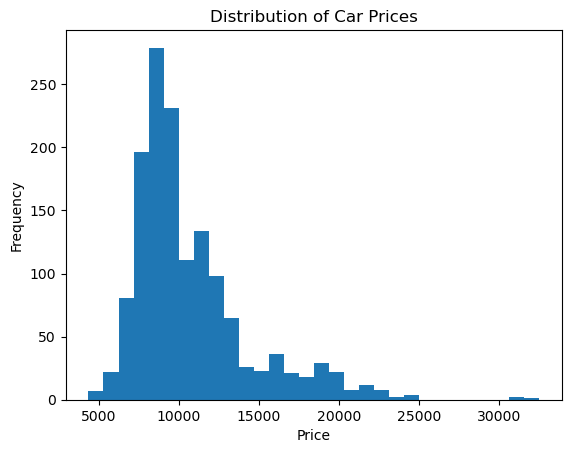

In [9]:
plt.hist(df['Price'], bins=30)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

##### 2. Correlation Heatmap

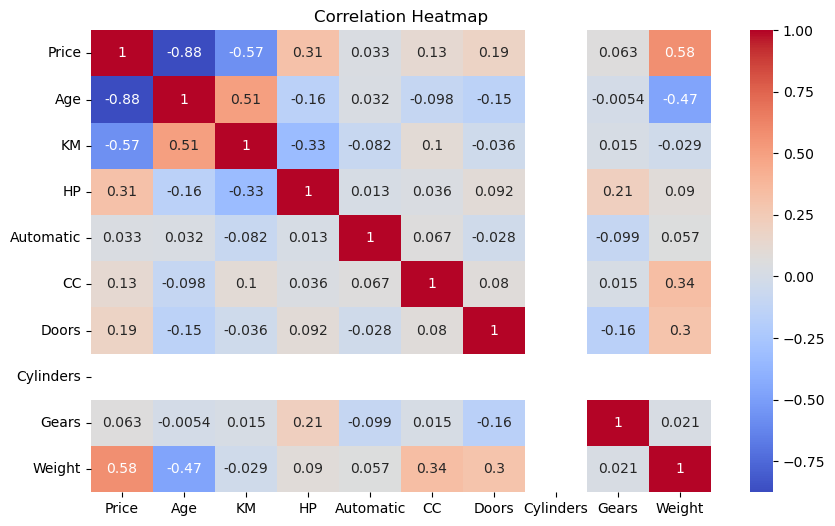

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 3. Scatterplots (Price vs Numeric Variables)

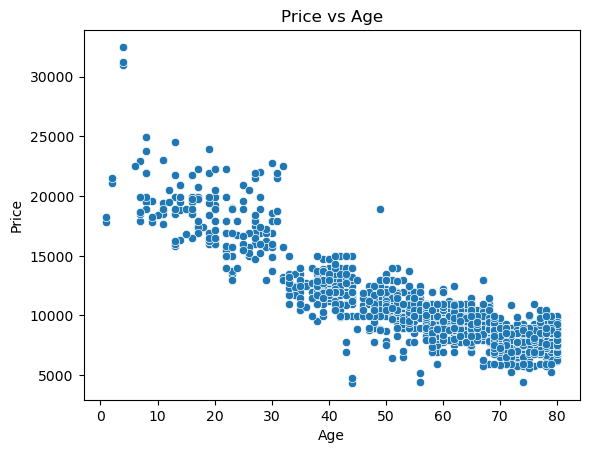

In [11]:
# Age vs Price
sns.scatterplot(x='Age', y='Price', data=df)
plt.title('Price vs Age')
plt.show()

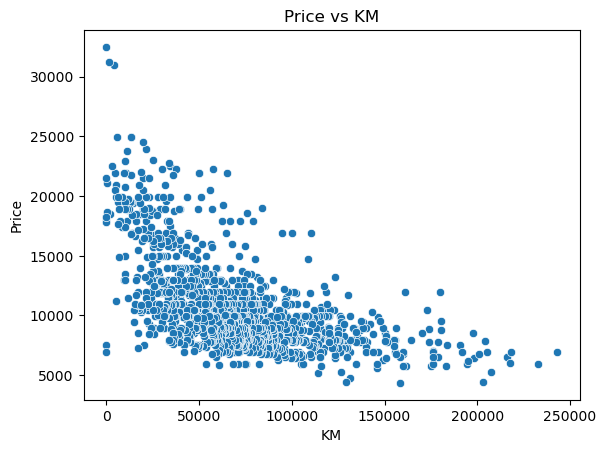

In [12]:
# KM vs Price
sns.scatterplot(x='KM', y='Price', data=df)
plt.title('Price vs KM')
plt.show()

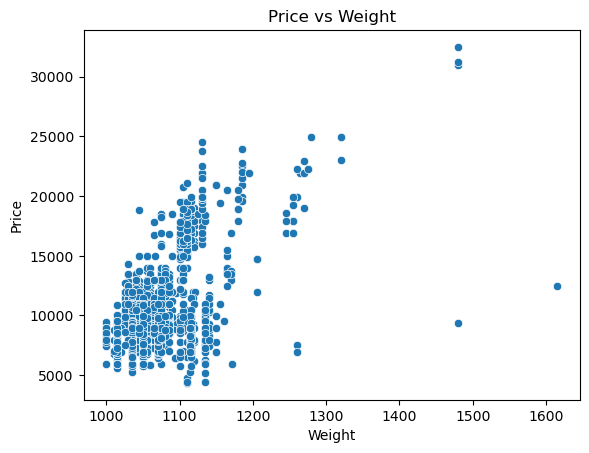

In [13]:
# Weight vc Price
sns.scatterplot(x='Weight', y='Price', data=df)
plt.title('Price vs Weight')
plt.show()

##### 4. Boxplot of Price vc Fuel Type

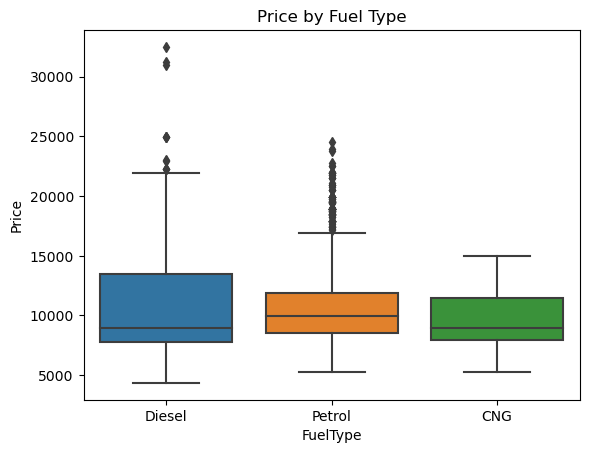

In [14]:
sns.boxplot(x='FuelType', y='Price', data=df)
plt.title('Price by Fuel Type')
plt.show()

### Outliers (Boxplots)

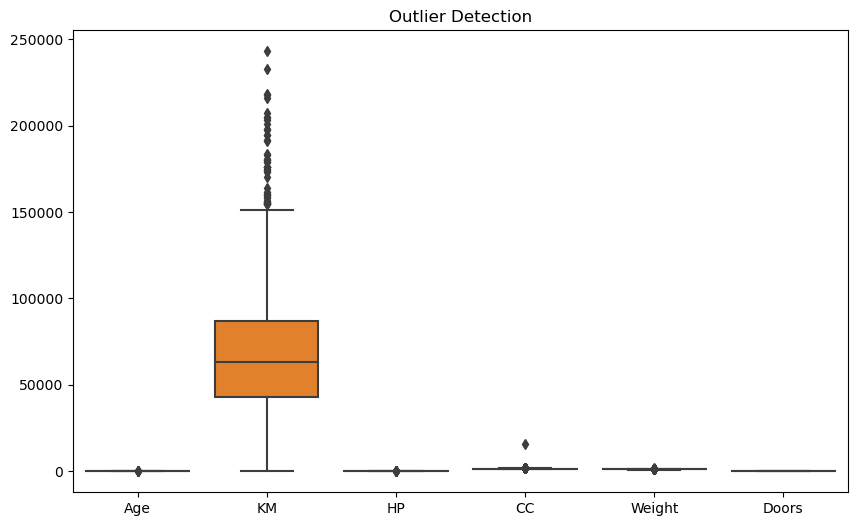

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Age','KM','HP','CC','Weight','Doors']])
plt.title("Outlier Detection")
plt.show()

### Pre-Processing for MLR

In [16]:
df_ml = df[['Age','KM','FuelType','HP','Automatic','CC','Doors','Weight','Price']]
df_ml

,Age,KM,FuelType,HP,Automatic,CC,Doors,Weight,Price
0,23,46986,Diesel,90,0,2000,3,1165,13500
1,23,72937,Diesel,90,0,2000,3,1165,13750
2,24,41711,Diesel,90,0,2000,3,1165,13950
3,26,48000,Diesel,90,0,2000,3,1165,14950
4,30,38500,Diesel,90,0,2000,3,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,Petrol,86,0,1300,3,1025,7500
1432,72,19000,Petrol,86,0,1300,3,1015,10845
1433,71,17016,Petrol,86,0,1300,3,1015,8500
1434,70,16916,Petrol,86,0,1300,3,1015,7250


In [17]:
df_ml = pd.get_dummies(df_ml,columns=['FuelType'], drop_first=True)

In [18]:
df_ml

,Age,KM,HP,Automatic,CC,Doors,Weight,Price,FuelType_Diesel,FuelType_Petrol
0,23,46986,90,0,2000,3,1165,13500,1,0
1,23,72937,90,0,2000,3,1165,13750,1,0
2,24,41711,90,0,2000,3,1165,13950,1,0
3,26,48000,90,0,2000,3,1165,14950,1,0
4,30,38500,90,0,2000,3,1170,13750,1,0
...,...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,0,1300,3,1025,7500,0,1
1432,72,19000,86,0,1300,3,1015,10845,0,1
1433,71,17016,86,0,1300,3,1015,8500,0,1
1434,70,16916,86,0,1300,3,1015,7250,0,1


X = df_ml.drop('Price', axis=1)
y = df_ml['Price']

import statsmodels.api as sm
X = sm.add_constant(X)

### 2.Split the dataset 

In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing target from features
numeric_cols.remove('Price')

In [32]:
X = df[numeric_cols]
y = df['Price']

In [33]:
X.head()
X.shape

(1436, 9)

In [34]:
y.head()
y.shape

(1436,)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1148, 9), (288, 9), (1148,), (288,))

### 3. Building and Evaluating the Model

##### 1. Multiple Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred1 = model1.predict(X_test)

###### Model Evaluation

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

In [44]:
print("MODEL 1: Basic Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred1))
print("RMSE:", mean_squared_error(y_test, y_pred1, squared=False))
print("Intercept:", model1.intercept_)

MODEL 1: Basic Linear Regression
R2 Score: 0.8523452141908859
RMSE: 1403.6119936838038
Intercept: -8216.385280016468


In [45]:
# Coefficients
coef_df1 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model1.coef_
})
print("\nMODEL 1 Coefficients:")
print(coef_df1)


MODEL 1 Coefficients:
     Feature   Coefficient
0        Age -1.207831e+02
1         KM -1.998627e-02
2         HP  2.742911e+01
3  Automatic  3.712087e+02
4         CC -1.135136e-01
5      Doors  7.535468e+00
6  Cylinders  2.387424e-12
7      Gears  6.264184e+02
8     Weight  1.984314e+01


##### 2.Standardized Linear Regression

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [49]:
model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

model2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [50]:
y_pred2 = model2.predict(X_test)

###### Model Evaluation

In [51]:
print("\nMODEL 2: Standardized Linear Regression")
print("R2 Score:", r2_score(y_test, y_pred2))
print("RMSE:", mean_squared_error(y_test, y_pred2, squared=False))


MODEL 2: Standardized Linear Regression
R2 Score: 0.852345214190885
RMSE: 1403.611993683808


In [52]:
# Extracting coefficients
reg2 = model2.named_steps['regressor']
scaler2 = model2.named_steps['scaler']

coef_df2 = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient (after scaling)': reg2.coef_
})
print("\nMODEL 2 Coefficients:")
print(coef_df2)


MODEL 2 Coefficients:
     Feature  Coefficient (after scaling)
0        Age                -2.266407e+03
1         KM                -7.531503e+02
2         HP                 4.070558e+02
3  Automatic                 8.579207e+01
4         CC                -5.292899e+01
5      Doors                 7.180232e+00
6  Cylinders                -3.268497e-12
7      Gears                 1.241711e+02
8     Weight                 1.009459e+03


##### 3. Linear Regression with One-Hot Encoding

In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [61]:
num_cols = ['Age', 'KM', 'HP', 'Automatic', 'CC', 'Doors',
                'Cylinders', 'Gears', 'Weight']

cat_cols = ['FuelType']

In [78]:
X1 = df[num_cols + cat_cols]

In [79]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state = 42)
X1_train.shape, X1_test.shape, y_train.shape, y_test.shape

((1148, 10), (288, 10), (1148,), (288,))

In [81]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

In [82]:
model3 = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

In [83]:
model3.fit(X1_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age', 'KM', 'HP',
                                                   'Automatic', 'CC', 'Doors',
                                                   'Cylinders', 'Gears',
                                                   'Weight']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['FuelType'])])),
                ('regressor', LinearRegression())])

In [84]:
y_pred3 = model3.predict(X1_test)

###### Model Evaluation

In [85]:
print("\nMODEL 3: Encoded + Standardized Regression")
print("R2 Score:", r2_score(y_test, y_pred3))
print("RMSE:", mean_squared_error(y_test, y_pred3, squared=False))


MODEL 3: Encoded + Standardized Regression
R2 Score: 0.8348888040611082
RMSE: 1484.265415329652


In [86]:
# Extract coefficients
reg3 = model3.named_steps['regressor']
ohe = model3.named_steps['preprocess'].named_transformers_['cat']
encoded_features = ohe.get_feature_names_out(cat_cols)

all_features = list(encoded_features) + numeric_cols

coef_df3 = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': reg3.coef_
})

In [87]:
print("\nMODEL 3 Coefficients:")
print(coef_df3)


MODEL 3 Coefficients:
            Feature   Coefficient
0   FuelType_Diesel -2.267295e+03
1   FuelType_Petrol -6.116544e+02
2               Age  2.083499e+02
3                KM  3.439713e+01
4                HP -1.416192e+01
5         Automatic -5.746780e+01
6                CC  1.136868e-13
7             Doors  1.093404e+02
8         Cylinders  1.316818e+03
9             Gears -6.854876e+01
10           Weight  1.370809e+03


# Lasso and Ridge Regression

In [75]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

### Ridge Regression

In [90]:
df2 = df.drop(columns=['FuelType'])
X3 = df2.drop(columns=['Price'])

In [92]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state = 42)
X3_train.shape, X3_test.shape, y_train.shape, y_test.shape

((1148, 9), (288, 9), (1148,), (288,))

In [93]:
ridge = Ridge(alpha=1.0)
ridge.fit(X3_train, y_train)

Ridge()

In [95]:
y_pred_ridge = ridge.predict(X3_test)

In [54]:
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
ridge_r2 = r2_score(y_test, y_pred_ridge)

print("RIDGE REGRESSION RESULTS")
print("RMSE:", ridge_rmse)
print("R²:", ridge_r2)
print("Coefficients:", ridge.coef_)

RIDGE REGRESSION RESULTS
RMSE: 1490.2455914357663
R²: 0.8335556420169206
Coefficients: [-1.20768306e+02 -1.60290990e-02  1.58303406e+01  9.27545541e+01
 -3.02514855e-02 -8.36687867e+01  2.60050327e+01 -6.65445076e+01
  1.36814207e+03]


### Lasso Regression

In [97]:
lasso = Lasso(alpha=0.1)
lasso.fit(X3_train, y_train)


Lasso(alpha=0.1)

In [98]:
y_pred_lasso = lasso.predict(X3_test)


In [99]:
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
lasso_r2 = r2_score(y_test, y_pred_lasso)

print("LASSO REGRESSION RESULTS")
print("RMSE:", lasso_rmse)
print("R²:", lasso_r2)
print("Coefficients:", lasso.coef_)


LASSO REGRESSION RESULTS
RMSE: 1403.6265691627195
R²: 0.8523421476021118
Coefficients: [-1.20777371e+02 -1.99876339e-02  2.74382523e+01  3.68917143e+02
 -1.13444628e-01  7.25948404e+00  0.00000000e+00  6.23207332e+02
  1.98459574e+01]


### Interview Questions

##### 1.What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are techniques used to scale numerical features so that the model can learn effectively.

Normalization brings the values into a 0 to 1 range. I use it when the data doesn’t follow a normal distribution or when I'm working with distance-based algorithms like KNN or K-Means.
It makes sure that features with large values don’t overpower smaller ones.

Standardization transforms the data so that it has a mean of 0 and a standard deviation of 1. This is especially useful for algorithms that assume normally distributed data, like Linear Regression, Logistic Regression or SVM.
It helps the model train faster and makes the coefficients more stable.

Both methods help improve model performance by keeping all features on a similar scale, but I choose between them based on the algorithm and the distribution of the data.

##### 2.What techniques can be used to address multicollinearity in multiple linear regression?

To address multicollinearity in Multiple Linear Regression, I usually follow a few standard techniques:

1.Check VIF (Variance Inflation Factor) – If a feature has a very high VIF, it indicates strong multicollinearity. I either remove that feature or combine it with others.

2.Remove Highly Correlated Predictors – If two independent variables are strongly correlated, I keep the more meaningful one and drop the other.

3.Use Regularization Techniques – Methods like Ridge and Lasso Regression help a lot.
-Ridge reduces the impact of correlated variables by shrinking coefficients.
-Lasso can completely eliminate unnecessary correlated features.

4.Principal Component Analysis (PCA) – If the dataset is highly correlated overall, PCA helps convert them into independent components.

5.Feature Engineering – Sometimes combining variables or transforming them can reduce collinearity.

I detect multicollinearity using VIF or correlation heatmaps and resolve it by removing variables, using regularization techniques, or applying dimensionality reduction.